<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-sequence-your-narrative/Vera_Mendes_LS_DS8_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
# starting loading all datasets

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [15]:
# dimensions of datasets
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
# quick way of looking into all my datasets without keeping them on the screen

# print(income.head())
# print(lifespan.head())
# print(population.head())
pd.options.display.max_columns = 40
# print(entities.head())
# print(concepts.head())

In [19]:
# merging datasets income and lifespan
df1 = pd.merge(income, lifespan)

print(df1.shape)
df1.head()

(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [20]:
# merging first merged dataset and population
df2 = pd.merge(df1, population)
print(df2.shape)
df2.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [22]:
# merging second merged dataset and some features of entities
# note: we merge by a feature that it is not identified the same way on both datasets
df3 = pd.merge(df2, 
              entities[['country', 'name', 'world_4region', 'world_6region']], 
              left_on='geo', right_on='country')
print(df3.shape)
df3.head()

(40437, 9)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [23]:
# final version of what we are looking at:
df_final = df3.rename(columns = {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'World in 6 regions',
    'world_4region': 'World in 4 regions'
})

df_final.head(20)

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia
5,afg,1805,603,28.16,3280000,afg,Afghanistan,asia,south_asia
6,afg,1806,603,28.15,3280000,afg,Afghanistan,asia,south_asia
7,afg,1807,603,28.14,3280000,afg,Afghanistan,asia,south_asia
8,afg,1808,603,28.13,3280000,afg,Afghanistan,asia,south_asia
9,afg,1809,603,28.12,3280000,afg,Afghanistan,asia,south_asia


In [40]:
# types of objects on dataset
df_final.dtypes

geo                    object
year                    int64
income                  int64
lifespan              float64
population              int64
country_code           object
country                object
World in 4 regions     object
World in 6 regions     object
dtype: object

In [41]:
# general info on new dataset
df_final.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [42]:
# general info on not numeric values
df_final.describe(exclude='number')

,geo,country_code,country,World in 4 regions,World in 6 regions
count,40437,40437,40437,40437,40437
unique,187,187,187,4,6
top,est,est,Slovak Republic,africa,europe_central_asia
freq,219,219,219,11826,10778


In [51]:
# looking for NaN's
df_final.isnull().sum()

geo                   0
year                  0
income                0
lifespan              0
population            0
country_code          0
country               0
World in 4 regions    0
World in 6 regions    0
dtype: int64

In [54]:
usa = df_final[df_final.country == 'United States']
usa.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
38028,usa,1800,2127,39.41,6801854,usa,United States,americas,america
38029,usa,1801,2167,39.41,6933517,usa,United States,americas,america
38030,usa,1802,2202,39.41,7067728,usa,United States,americas,america
38031,usa,1803,2166,39.41,7204538,usa,United States,americas,america
38032,usa,1804,2165,39.41,7343995,usa,United States,americas,america


In [55]:
usa.describe()

,year,income,lifespan,population
count,219.000000,219.000000,219.000000,2.190000e+02
mean,1909.000000,14572.936073,54.846256,1.163662e+08
std,63.364028,15066.042247,15.202079,9.738644e+07
min,1800.000000,2113.000000,31.000000,6.801854e+06
25%,1854.500000,3512.500000,39.410000,2.752198e+07
50%,1909.000000,7989.000000,51.780000,9.236198e+07
75%,1963.500000,20090.500000,70.270000,1.962540e+08
max,2018.000000,54898.000000,79.140000,3.267667e+08


In [56]:
usa[usa.year.isin([1818,1918,2018])]

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
38046,usa,1818,2258,39.41,9879049,usa,United States,americas,america
38146,usa,1918,9371,47.18,106721812,usa,United States,americas,america
38246,usa,2018,54898,79.14,326766748,usa,United States,americas,america


In [57]:
china = df_final[df_final.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
6854,chn,1818,985,32.00,374161494,chn,China,asia,east_asia_pacific
6954,chn,1918,989,22.13,462444535,chn,China,asia,east_asia_pacific
7054,chn,2018,16018,76.92,1415045928,chn,China,asia,east_asia_pacific


In [24]:
now = df_final[df_final.year == 2018]
then = df_final[df_final.year == 1918]
now.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,ago,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,alb,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,arg,2018,18942,76.97,44688864,arg,Argentina,americas,america


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


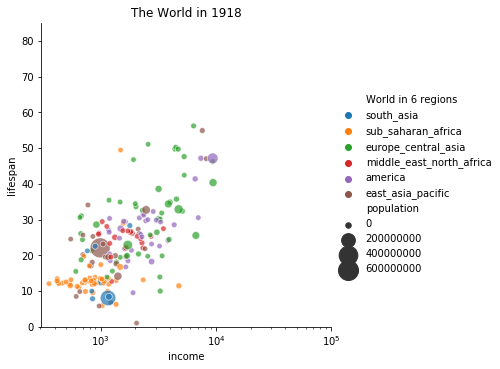

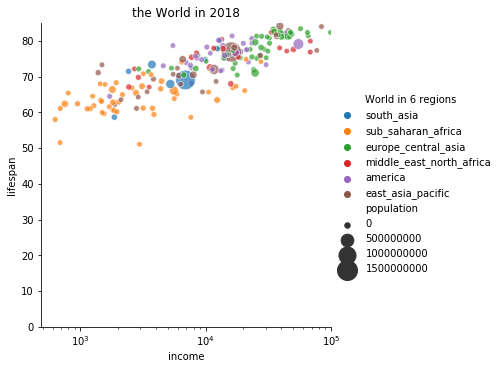

In [62]:
sns.relplot(x='income', y='lifespan', hue='World in 6 regions', size='population', 
            sizes=(30, 400), alpha=0.7, data=then)
plt.xscale('log')
plt.title("The World in 1918")
plt.ylim(0,85)
plt.xlim(0,100000)

sns.relplot(x='income', y='lifespan', hue='World in 6 regions', size='population', 
            sizes=(30, 400), alpha=0.7, data=now)
plt.xscale('log')
plt.title("the World in 2018")
plt.ylim(0,85)
plt.xlim(0,100000);

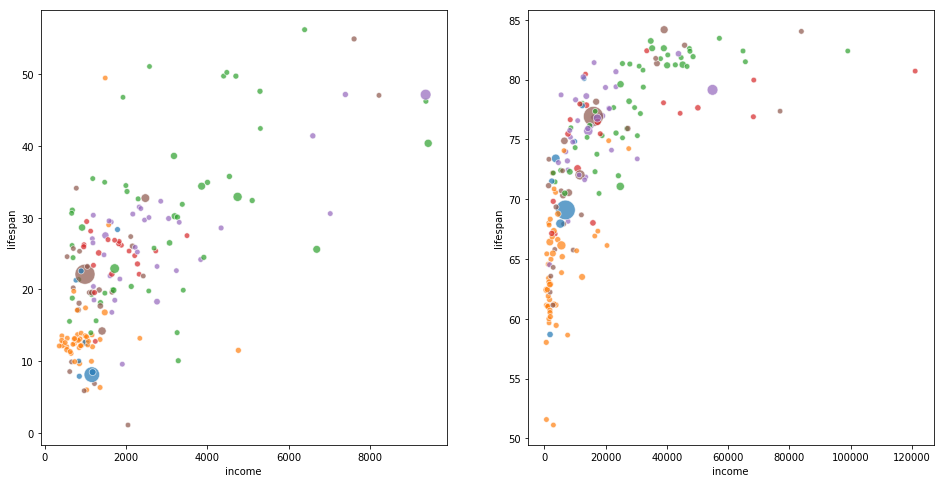

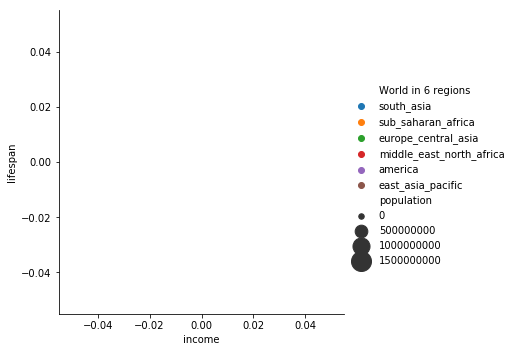

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.relplot(x='income', y='lifespan', hue='World in 6 regions', size='population', 
            sizes=(30, 400), alpha=0.7, data=then, ax=ax[0]);

sns.relplot(x='income', y='lifespan', hue='World in 6 regions', size='population', 
            sizes=(30, 400), alpha=0.7, data=now, ax=ax[1]);

plt.close(2)
plt.show()

In [72]:
# Qatar is the richest country in 2018
now.sort_values('income', ascending=False)

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
30362,qat,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa
22212,lux,2018,99034,82.39,590321,lux,Luxembourg,europe,europe_central_asia
31895,sgp,2018,83888,84.03,5791901,sgp,Singapore,asia,east_asia_pacific
5521,brn,2018,76943,77.36,434076,brn,Brunei,asia,east_asia_pacific
20241,kwt,2018,68359,79.96,4197128,kwt,Kuwait,asia,middle_east_north_africa
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
16956,irl,2018,65622,81.49,4803748,irl,Ireland,europe,europe_central_asia
27296,nor,2018,64846,82.39,5353363,nor,Norway,europe,europe_central_asia
6616,che,2018,57133,83.45,8544034,che,Switzerland,europe,europe_central_asia
38246,usa,2018,54898,79.14,326766748,usa,United States,americas,america


In [34]:
now_qatar = now[now.country=='Qatar']
now_qatar.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
30362,qat,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa


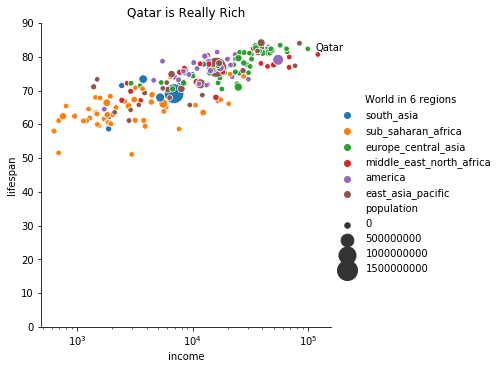

In [78]:
sns.relplot(x='income', y='lifespan', hue='World in 6 regions', size='population', 
            sizes=(30,400), data=now)
plt.xscale('log')
plt.ylim(0,90)
plt.title("Qatar is Really Rich")
plt.text(x=now_qatar.income-4800, y= now_qatar.lifespan+1, s='Qatar')
plt.show()

In [25]:
years = [1818, 1918, 2018]
centuries = df_final[df_final.year.isin(years)]

centuries.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
18,afg,1818,604,28.03,3308390,afg,Afghanistan,asia,south_asia
118,afg,1918,849,7.89,5704092,afg,Afghanistan,asia,south_asia
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
237,ago,1818,668,26.98,1586896,ago,Angola,africa,sub_saharan_africa
337,ago,1918,1174,12.01,3487015,ago,Angola,africa,sub_saharan_africa


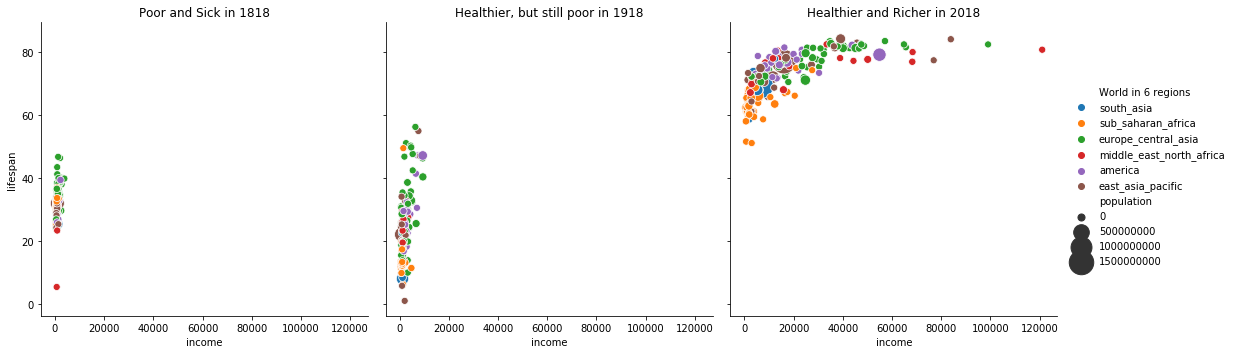

In [85]:
fig = sns.relplot(x='income', y='lifespan', hue='World in 6 regions', size='population', 
                  sizes=(50,600), col='year', data=centuries)

axes = fig.axes.flatten()
axes[0].set_title('Poor and Sick in 1818')
axes[1].set_title('Healthier, but still poor in 1918')
axes[2].set_title('Healthier and Richer in 2018');

In [0]:
changes = [1918, 1938, 1978, 1998, 2018]

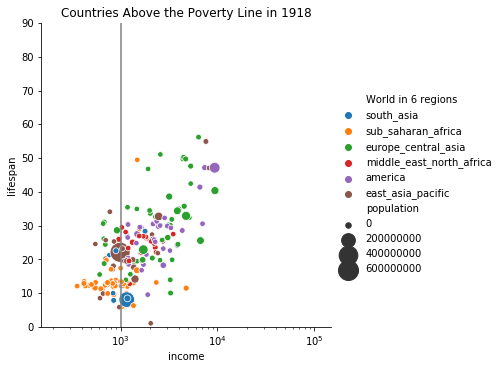

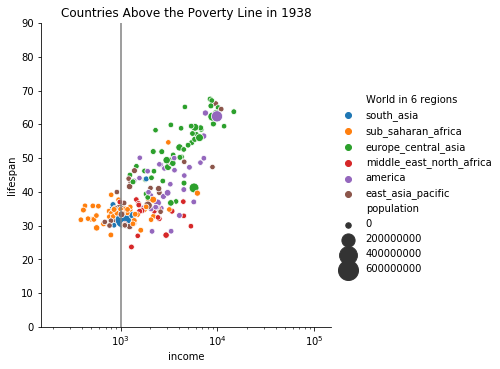

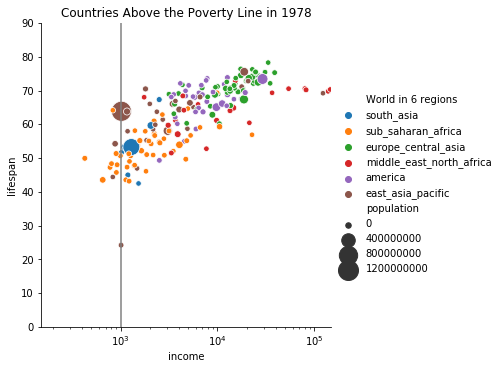

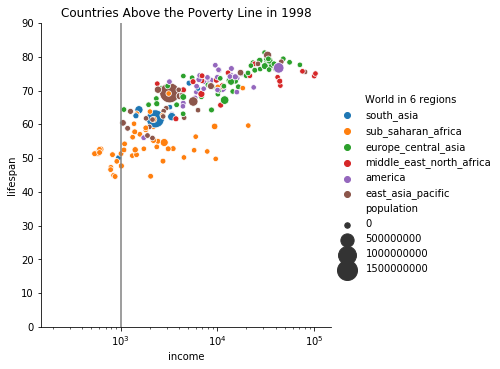

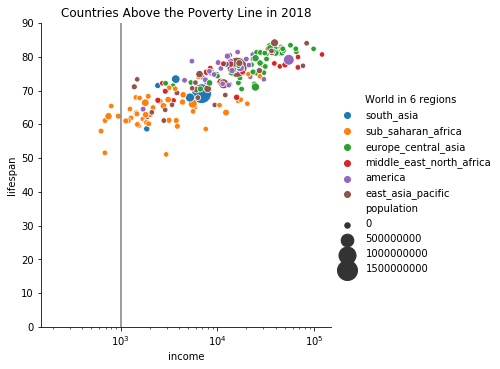

In [90]:
for change in changes:
  sns.relplot(x='income', y='lifespan', hue='World in 6 regions', size='population', 
              sizes=(30,400), data=df_final[df_final.year==change])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title('Countries Above the Poverty Line in ' + str(change))
  plt.axvline(x=1000, color='grey')

In [46]:
# looking into regions and values
df_final['World in 6 regions'].value_counts()

europe_central_asia         10778
sub_saharan_africa          10512
america                      7274
east_asia_pacific            5741
middle_east_north_africa     4380
south_asia                   1752
Name: World in 6 regions, dtype: int64

In [105]:
df_final['country'].value_counts()

Slovak Republic                   219
Saudi Arabia                      219
United Arab Emirates              219
Slovenia                          219
Oman                              219
Morocco                           219
El Salvador                       219
Cape Verde                        219
Mali                              219
Rwanda                            219
Maldives                          219
Qatar                             219
Mozambique                        219
United States                     219
Bangladesh                        219
Sierra Leone                      219
Haiti                             219
Austria                           219
Trinidad and Tobago               219
Solomon Islands                   219
Mauritius                         219
Malawi                            219
Congo, Rep.                       219
Fiji                              219
Senegal                           219
Antigua and Barbuda               219
Central Afri

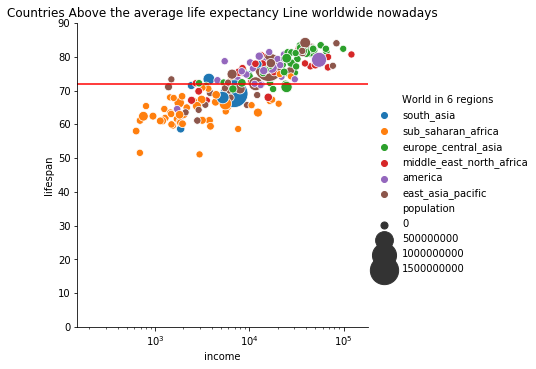

In [26]:
# as per WHO: 72.0 years was the average life expectancy at birth of the global population in 2016

sns.relplot(x='income', y='lifespan', hue='World in 6 regions', size='population', 
              sizes=(50,800), data=df_final[df_final.year==2018])
plt.xscale('log')
plt.xlim((150, 180000))
plt.ylim((0, 90))
plt.title('Countries Above the average life expectancy Line worldwide nowadays')
plt.axhline(y=72, color='red');

In [27]:
now_germany = now[now.country == 'Germany']
now_germany.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
9682,deu,2018,45166,81.25,82293457,deu,Germany,europe,europe_central_asia


In [28]:
now_usa = now[now.country == 'United States']
now_usa.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
38246,usa,2018,54898,79.14,326766748,usa,United States,americas,america


In [29]:
now_china = now[now.country == 'China']
now_china.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
7054,chn,2018,16018,76.92,1415045928,chn,China,asia,east_asia_pacific


In [30]:
now_russia = now[now.country == 'Russia']
now_russia.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
30800,rus,2018,24786,71.07,143964709,rus,Russia,europe,europe_central_asia


In [31]:
now_uae = now[now.country == 'United Arab Emirates']
now_uae.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa


In [32]:
now_uk = now[now.country == 'United Kingdom']
now_uk.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
13233,gbr,2018,40079,81.19,66573504,gbr,United Kingdom,europe,europe_central_asia


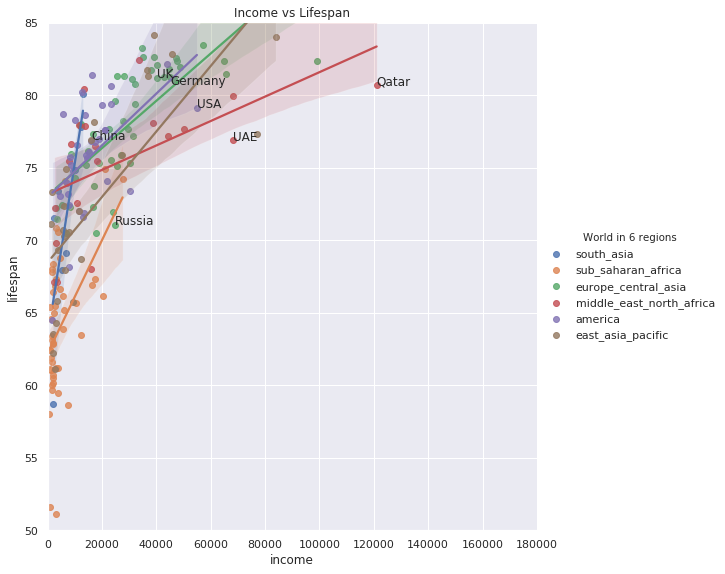

In [55]:
# regression line to evaluate relationship for income and lifespan in the different 6 regions of the world
# special look into Qatar, Germany, USA, China, Russia, UAE, UK

g = sns.lmplot(x='income', y='lifespan', hue='World in 6 regions',
               truncate=True, height=8, data=now)
plt.xlim((0, 180000))
plt.ylim(50,85)
plt.title("Income vs Lifespan")
plt.text(x=now_qatar.income, y= now_qatar.lifespan, s='Qatar')
plt.text(x=now_germany.income, y= now_qatar.lifespan, s='Germany')
plt.text(x=now_usa.income, y= now_usa.lifespan, s='USA')
plt.text(x=now_china.income, y= now_china.lifespan, s='China')
plt.text(x=now_russia.income, y= now_russia.lifespan, s='Russia')
plt.text(x=now_uae.income, y= now_uae.lifespan, s='UAE')
plt.text(x=now_uk.income, y= now_uk.lifespan, s='UK')
colors = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(colors) 
plt.show()

In [0]:
# looking into different times of history for Germany and UK (World War 1, World War 2)

# centuries = [1818,1918,2018]
# ww1 = [1914, 1915, 1916, 1917, 1918]
# ww2 = [1939, 1940, 1941, 1942, 1943, 1944, 1945]

In [36]:
uk = df_final[df_final.country=='United Kingdom']
uk.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
13015,gbr,1800,3429,38.65,12327466,gbr,United Kingdom,europe,europe_central_asia
13016,gbr,1801,3437,37.35,12483870,gbr,United Kingdom,europe,europe_central_asia
13017,gbr,1802,3448,38.62,12642258,gbr,United Kingdom,europe,europe_central_asia
13018,gbr,1803,3337,37.32,12802656,gbr,United Kingdom,europe,europe_central_asia
13019,gbr,1804,3289,41.44,12965089,gbr,United Kingdom,europe,europe_central_asia


In [37]:
ukww1 = uk[uk.year.isin([1914,1915,1916, 1917, 1918])]

ukww1.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
13129,gbr,1914,8925,51.94,43017770,gbr,United Kingdom,europe,europe_central_asia
13130,gbr,1915,9325,48.15,43325210,gbr,United Kingdom,europe,europe_central_asia
13131,gbr,1916,9373,47.68,43529628,gbr,United Kingdom,europe,europe_central_asia
13132,gbr,1917,9272,45.52,43608877,gbr,United Kingdom,europe,europe_central_asia
13133,gbr,1918,9434,40.39,43596369,gbr,United Kingdom,europe,europe_central_asia


In [38]:
germany = df_final[df_final.country=='Germany']
germany.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
9464,deu,1800,1639,38.37,22886919,deu,Germany,europe,europe_central_asia
9465,deu,1801,1650,38.37,22983824,deu,Germany,europe,europe_central_asia
9466,deu,1802,1662,38.37,23081140,deu,Germany,europe,europe_central_asia
9467,deu,1803,1673,38.37,23178868,deu,Germany,europe,europe_central_asia
9468,deu,1804,1685,38.37,23277009,deu,Germany,europe,europe_central_asia


In [39]:
germanyww1 = germany[germany.year.isin([1914,1915,1916, 1917, 1918])]

germanyww1.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
9578,deu,1914,4790,46.15,67278503,deu,Germany,europe,europe_central_asia
9579,deu,1915,4557,40.51,67648794,deu,Germany,europe,europe_central_asia
9580,deu,1916,4631,38.97,67558517,deu,Germany,europe,europe_central_asia
9581,deu,1917,4677,40.06,67242967,deu,Germany,europe,europe_central_asia
9582,deu,1918,4744,32.92,65348955,deu,Germany,europe,europe_central_asia


In [156]:
# general look on UK info during WW1
ukww1.describe()

,year,income,lifespan,population
count,5.000000,5.000000,5.000000,5.000000e+00
mean,1916.000000,9265.800000,46.736000,4.341557e+07
std,1.581139,199.668976,4.234457,2.497373e+05
min,1914.000000,8925.000000,40.390000,4.301777e+07
25%,1915.000000,9272.000000,45.520000,4.332521e+07
50%,1916.000000,9325.000000,47.680000,4.352963e+07
75%,1917.000000,9373.000000,48.150000,4.359637e+07
max,1918.000000,9434.000000,51.940000,4.360888e+07


In [158]:
# general look on Germany info during WW1
germanyww1.describe()

,year,income,lifespan,population
count,5.000000,5.000000,5.000000,5.000000e+00
mean,1916.000000,4679.800000,39.722000,6.701555e+07
std,1.581139,91.835178,4.713997,9.479205e+05
min,1914.000000,4557.000000,32.920000,6.534896e+07
25%,1915.000000,4631.000000,38.970000,6.724297e+07
50%,1916.000000,4677.000000,40.060000,6.727850e+07
75%,1917.000000,4744.000000,40.510000,6.755852e+07
max,1918.000000,4790.000000,46.150000,6.764879e+07


In [40]:
ukww2 = uk[uk.year.isin([1939,1940,1941, 1942, 1943, 1944, 1945])]

ukww2.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
13154,gbr,1939,10055,63.59,47994840,gbr,United Kingdom,europe,europe_central_asia
13155,gbr,1940,10972,60.88,48235965,gbr,United Kingdom,europe,europe_central_asia
13156,gbr,1941,11903,61.28,48372558,gbr,United Kingdom,europe,europe_central_asia
13157,gbr,1942,12043,63.89,48560582,gbr,United Kingdom,europe,europe_central_asia
13158,gbr,1943,12126,63.91,48827756,gbr,United Kingdom,europe,europe_central_asia


In [41]:
germanyww2 = germany[germany.year.isin([1939,1940,1941, 1942, 1943, 1944, 1945])]

germanyww2.head()

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
9603,deu,1939,9655,60.95,70852614,deu,Germany,europe,europe_central_asia
9604,deu,1940,9691,60.60,71427817,deu,Germany,europe,europe_central_asia
9605,deu,1941,10288,58.95,71955938,deu,Germany,europe,europe_central_asia
9606,deu,1942,10384,54.95,72152449,deu,Germany,europe,europe_central_asia
9607,deu,1943,10698,49.65,72023148,deu,Germany,europe,europe_central_asia


In [161]:
# general look on UK info during WW2
ukww2.describe()

,year,income,lifespan,population
count,7.000000,7.000000,7.000000,7.000000e+00
mean,1942.000000,11363.285714,63.434286,4.861607e+07
std,2.160247,754.030661,1.764038,4.546747e+05
min,1939.000000,10055.000000,60.880000,4.799484e+07
25%,1940.500000,10950.500000,62.435000,4.830426e+07
50%,1942.000000,11515.000000,63.890000,4.856058e+07
75%,1943.500000,11973.000000,64.330000,4.895834e+07
max,1945.000000,12126.000000,65.740000,4.923186e+07


In [164]:
# general look on Germany info during WW2
germanyww2.describe()

,year,income,lifespan,population
count,7.000000,7.000000,7.000000,7.000000e+00
mean,1942.000000,10010.571429,50.147143,7.112662e+07
std,2.160247,925.730317,12.577367,1.189083e+06
min,1939.000000,8264.000000,28.970000,6.875923e+07
25%,1940.500000,9673.000000,43.305000,7.078387e+07
50%,1942.000000,10288.000000,54.950000,7.142782e+07
75%,1943.500000,10541.000000,59.775000,7.198954e+07
max,1945.000000,11094.000000,60.950000,7.215245e+07


In [42]:
# info for UK and Germany during WW2
ww2 = pd.concat([germanyww2, ukww2])
ww2.head(10)

,geo,year,income,lifespan,population,country_code,country,World in 4 regions,World in 6 regions
9603,deu,1939,9655,60.95,70852614,deu,Germany,europe,europe_central_asia
9604,deu,1940,9691,60.60,71427817,deu,Germany,europe,europe_central_asia
9605,deu,1941,10288,58.95,71955938,deu,Germany,europe,europe_central_asia
9606,deu,1942,10384,54.95,72152449,deu,Germany,europe,europe_central_asia
9607,deu,1943,10698,49.65,72023148,deu,Germany,europe,europe_central_asia
9608,deu,1944,11094,36.96,70715125,deu,Germany,europe,europe_central_asia
9609,deu,1945,8264,28.97,68759231,deu,Germany,europe,europe_central_asia
13154,gbr,1939,10055,63.59,47994840,gbr,United Kingdom,europe,europe_central_asia
13155,gbr,1940,10972,60.88,48235965,gbr,United Kingdom,europe,europe_central_asia
13156,gbr,1941,11903,61.28,48372558,gbr,United Kingdom,europe,europe_central_asia


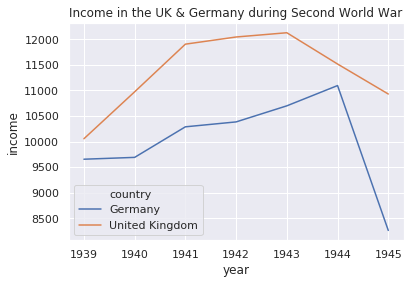

In [62]:
# During WW2 the income is still growing slowing in both UK & Germany.
# In the end of the war, Germany lost the war, we can see a little decrease in UK income, but a very big decrease in the Germany income.
sns.set(style="darkgrid")

sns.lineplot(x=ww2['year'], y=ww2['income'],
             hue=ww2['country'],
             data=ww2)
plt.title("Income in the UK & Germany during Second World War")
plt.show()

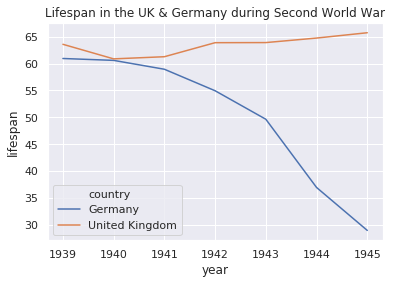

In [52]:
# Lifespan in the UK is quite constant, even during WW2, but Germany's lifespan suffers a big decrease specially towards the end of the WW2. 
sns.set(style="darkgrid")

sns.lineplot(x=ww2['year'], y=ww2['lifespan'],
             hue=ww2['country'],
             data=ww2)
plt.title("Lifespan in the UK & Germany during Second World War")
plt.show()

In [0]:
sns.set(style="darkgrid")

sns.lineplot(x=ww2['year'], y=ww2['lifespan'],
             hue=ww2['country'],
             data=ww2)
plt.title("Lifespan in the UK & Germany during Second World War")
plt.show()

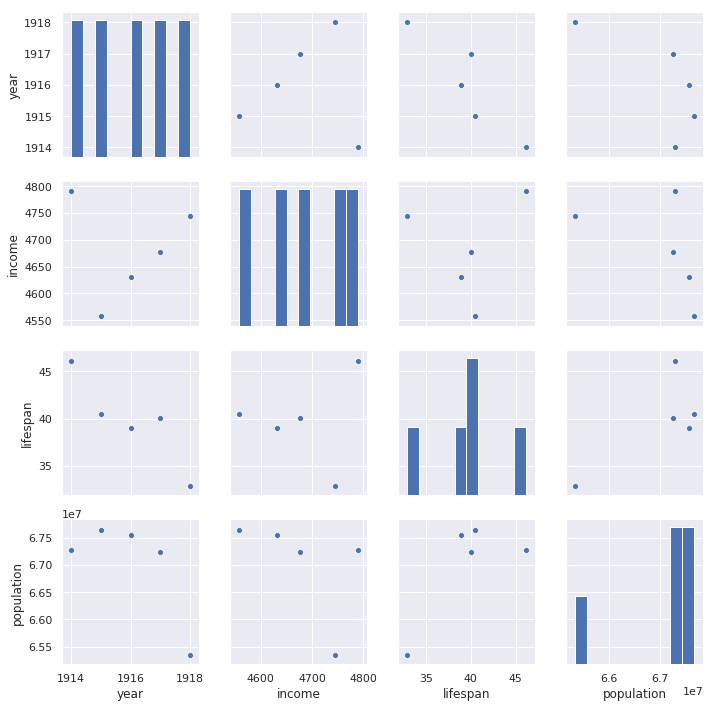

In [48]:
#  variations in features during WW1 in Germany
#  quite evident relationship between income and year
sns.pairplot(germanyww1);

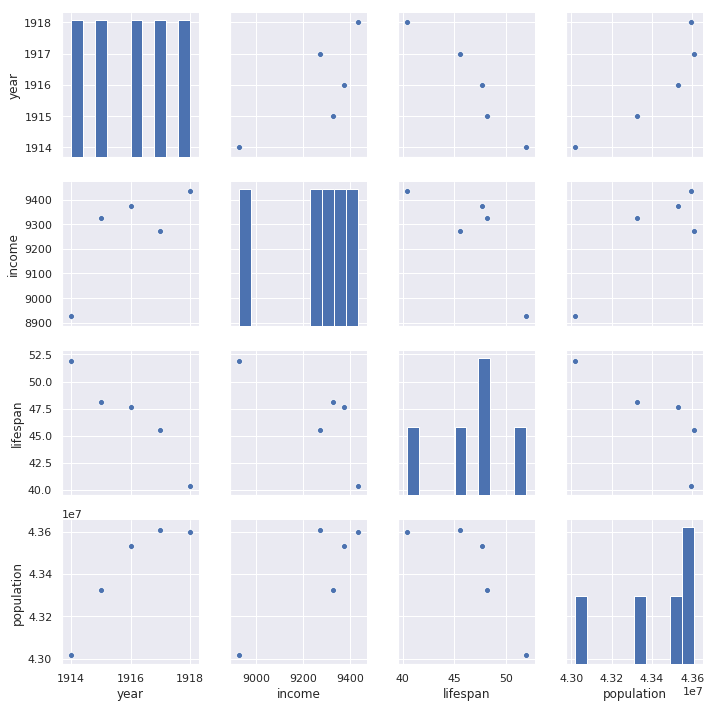

In [49]:
#  variations in features during WW1 in the UK
#  interesting relationship between year and population, as population is growing even during war
sns.pairplot(ukww1);

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project